In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import glob
import statistics
%matplotlib inline

In [2]:
def es_point(s,p):
    max_index=np.where(s[2]==np.amax(s[2]))
    max_index=max_index[0]+p
    return max_index[0]

In [3]:
def windowed(s,window_size):
    s1=[]
    sv=[]
    window_size=10
    for i in range(len(s[2])-window_size):
        d=s[2][i:i+window_size]
        dm=sum(d)/window_size
        s1.append(dm)
        dv=statistics.variance(d)
        sv.append(dv)
    return s1,sv

### local optimizor using Adam, Fed using FedAvg

In [4]:
basedir=os.path.join('adam')
# os.listdir(basedir)

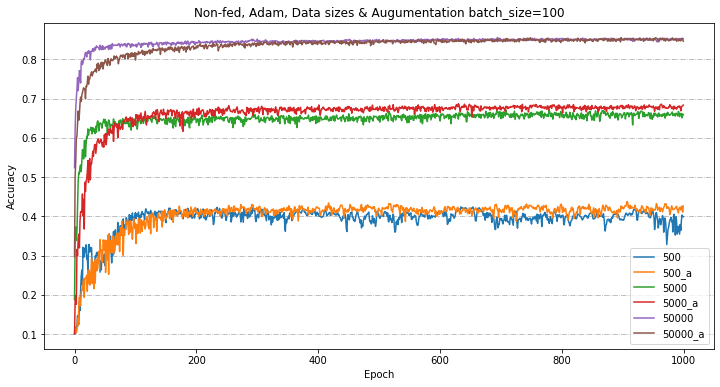

In [5]:
'''
# non-fed Adam
With different data size, batch size=100
The final convergence is related to data size, so in later tests we fix total data size to 5000
The augumentation method used here doesn't help much, so in later tests we will not use augument.
'''

s1=np.load(os.path.join(basedir,'500_central.npy'))

s2=np.load(os.path.join(basedir,'500_central_augument.npy'))
s3=np.load(os.path.join(basedir,'5000_central.npy'))
s4=np.load(os.path.join(basedir,'5000_central_augument.npy'))
s5=np.load(os.path.join(basedir,'50000_central.npy'))
s6=np.load(os.path.join(basedir,'50000_central_augument.npy'))
plt.plot(s1[0],s1[2], label='500')
plt.plot(s2[0],s2[2], label='500_a')
plt.plot(s3[0],s3[2], label='5000')
plt.plot(s4[0],s4[2], label='5000_a')
plt.plot(s5[0],s5[2], label='50000')
plt.plot(s6[0],s6[2], label='50000_a')

plt.gcf().set_size_inches(12, 6)
plt.grid(axis="y",ls='-.')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Non-fed, Adam, Data sizes & Augumentation batch_size=100')
plt.legend()

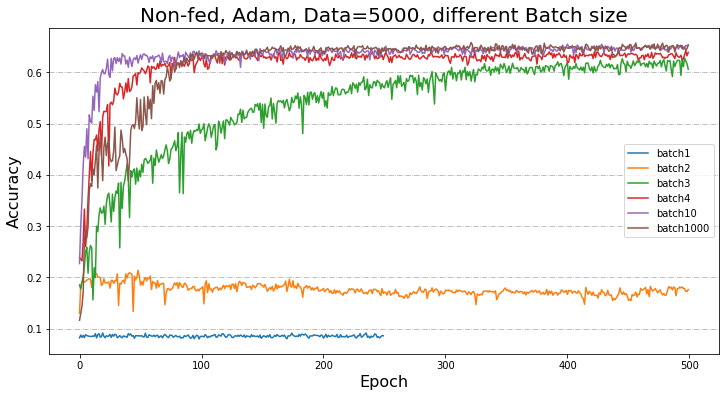

In [6]:
'''
# non-fed Adam

# When larger batch is slower:
Decreasing learning_rate can have similar effect as increasing batchsize.(https://arxiv.org/pdf/1711.00489.pdf)
So this is why larger batchsize converge slower and has more zigzag curve?
TODO: If case[more small nodes] can have smoother curve than case[less large nodes]?

# Some says larger batch is better, can have smoother curve? (not for this case, maybe it's within some range)
In our case batch_size=1 won't converge.
Because in each batch there's only one class, it's similar to strong non-iid in federated training...?
So since batch_size=5 works properly, the weak non-iid case of 5w/node will not decrease performance either?
If so, maybe I can choose batch_size=[1-9] for pre-simulating some of the non-iid fedML secnarios?
Or manually rank the input data and avoid shuffle?
(TODO: make sure how exactly adam works.. I think it's also average mini-batches..?)


In our case batch1000 converge slower than batch100.
So at least batch_size in [10-100] can work properly. In later tests we all choose batch_size=100.

'''
s1=np.load(os.path.join(basedir,'5000_central.batch1.npy'))
plt.plot(s1[0],s1[2], label='batch1')

s1=np.load(os.path.join(basedir,'5000_central.batch2.npy'))
plt.plot(s1[0],s1[2], label='batch2')

s1=np.load(os.path.join(basedir,'5000_central.batch3.npy'))
plt.plot(s1[0],s1[2], label='batch3')

s1=np.load(os.path.join(basedir,'5000_central.batch4.npy'))
plt.plot(s1[0],s1[2], label='batch4')

s1=np.load(os.path.join(basedir,'5000_central.batch5.npy'))
# plt.plot(s1[0],s1[2], label='batch5')

s1=np.load(os.path.join(basedir,'5000_central.batch10.npy'))
plt.plot(s1[0][:500],s1[2][:500], label='batch10')

s1=np.load(os.path.join(basedir,'5000_central.batch50.npy'))
# plt.plot(s1[0][:500],s1[2][:500], label='batch50')

s1=np.load(os.path.join(basedir,'5000_central.npy'))
# plt.plot(s1[0][:500],s1[2][:500], label='batch100')

s1=np.load(os.path.join(basedir,'5000_central.batch500.npy'))
# plt.plot(s1[0][:500],s1[2][:500], label='batch500')

s1=np.load(os.path.join(basedir,'5000_central.batch1000.npy'))
plt.plot(s1[0][:500],s1[2][:500], label='batch1000')

plt.gcf().set_size_inches(12, 6)
plt.grid(axis="y",ls='-.')
plt.xlabel('Epoch',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Non-fed, Adam, Data=5000, different Batch size',fontsize=20)
plt.legend()

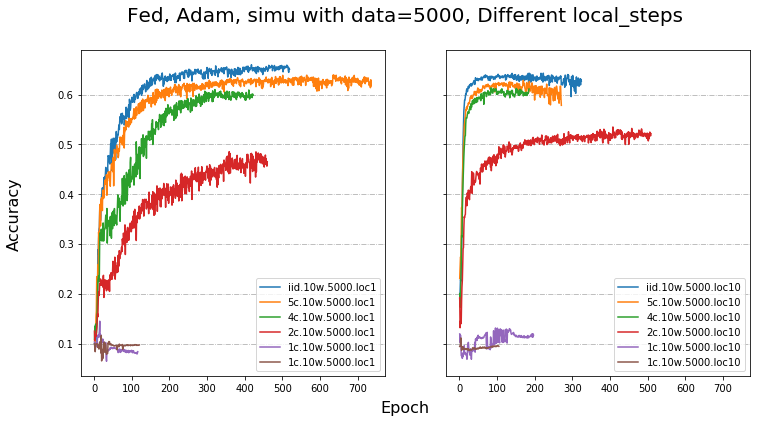

In [7]:
'''
Fed simu with data=5000, batch_size=100

'''

fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(12, 6))

fig.text(0.5, 0.04, 'Epoch', ha='center',fontsize=16)
fig.text(0.04, 0.5, 'Accuracy', va='center', rotation='vertical',fontsize=16)
fig.suptitle('Fed, Adam, simu with data=5000, Different local_steps',fontsize=20)

##################################### loc=1
iid1w=[
    'iid.10w.5000.loc1.earlystop100.20200305-205717.npy',
    'weak.5c.10w.5000.loc1.earlystop100.20200306-024012.npy',
    'weak.4c.10w.5000.loc1.earlystop100.20200305-182837.npy',
    'strong.2c.10w.5000.loc1.earlystop100.20200305-194220.npy',
    'strong.1c.10w.5000.loc1.earlystop100.20200305-102707.npy',
    'strong.1c.10w.5000.loc1.earlystop100.20200306-103040.npy'
]

lab1w=[
    'iid.10w.5000.loc1',
    '5c.10w.5000.loc1',
    '4c.10w.5000.loc1',
    '2c.10w.5000.loc1',
    '1c.10w.5000.loc1',
    '1c.10w.5000.loc1'
]

l=len(iid1w)

for i in range(l):
    s1=np.load(os.path.join(basedir,iid1w[i]))
    ax[0].plot(s1[0],s1[2], label=lab1w[i])

ax[0].grid(axis="y",ls='-.')
ax[0].legend()


##################################### loc=10
iid10w=[
    'iid.10w.5000.loc10.earlystop100.20200306-224652.npy',
    'weak.5c.10w.5000.loc10.earlystop100.20200306-193410.npy',
    'weak.4c.10w.5000.loc10.earlystop100.20200306-035118.npy',
    'strong.2c.10w.5000.loc10.earlystop100.20200307-072647.npy',
    'strong.1c.10w.5000.loc10.earlystop100.20200306-003026.npy',
    'strong.1c.10w.5000.loc10.earlystop100.20200306-163552.npy'
]

lab10w=[
    'iid.10w.5000.loc10',
    '5c.10w.5000.loc10',
    '4c.10w.5000.loc10',
    '2c.10w.5000.loc10',
    '1c.10w.5000.loc10',
    '1c.10w.5000.loc10'
]

l=len(iid10w)

for i in range(l):
    s1=np.load(os.path.join(basedir,iid10w[i]))
    ax[1].plot(s1[0],s1[2], label=lab10w[i])

ax[1].grid(axis="y",ls='-.')
ax[1].legend()


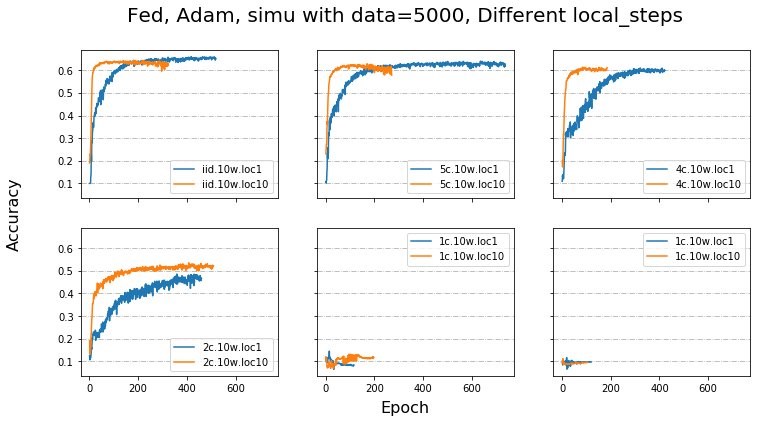

In [8]:
'''

'''
fig, ax = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(12, 6))

fig.text(0.5, 0.04, 'Epoch', ha='center',fontsize=16)
fig.text(0.04, 0.5, 'Accuracy', va='center', rotation='vertical',fontsize=16)
fig.suptitle('Fed, Adam, simu with data=5000, Different local_steps',fontsize=20)


s1=np.load(os.path.join(basedir,'iid.10w.5000.loc1.earlystop100.20200305-205717.npy'))
ax[0, 0].plot(s1[0],s1[2], label='iid.10w.loc1')
s1=np.load(os.path.join(basedir,'iid.10w.5000.loc10.earlystop100.20200306-224652.npy'))
ax[0, 0].plot(s1[0],s1[2], label='iid.10w.loc10')
ax[0, 0].grid(axis="y",ls='-.')
ax[0, 0].legend()


s1=np.load(os.path.join(basedir,'weak.5c.10w.5000.loc1.earlystop100.20200306-024012.npy'))
ax[0, 1].plot(s1[0],s1[2], label='5c.10w.loc1')
s1=np.load(os.path.join(basedir,'weak.5c.10w.5000.loc10.earlystop100.20200306-193410.npy'))
ax[0, 1].plot(s1[0],s1[2], label='5c.10w.loc10')
ax[0, 1].grid(axis="y",ls='-.')
ax[0, 1].legend()


s1=np.load(os.path.join(basedir,'weak.4c.10w.5000.loc1.earlystop100.20200305-182837.npy'))
ax[0, 2].plot(s1[0],s1[2], label='4c.10w.loc1')
s1=np.load(os.path.join(basedir,'weak.4c.10w.5000.loc10.earlystop100.20200306-035118.npy'))
ax[0, 2].plot(s1[0],s1[2], label='4c.10w.loc10')
ax[0, 2].grid(axis="y",ls='-.')
ax[0, 2].legend()

s1=np.load(os.path.join(basedir,'strong.2c.10w.5000.loc1.earlystop100.20200305-194220.npy'))
ax[1, 0].plot(s1[0],s1[2], label='2c.10w.loc1')
s1=np.load(os.path.join(basedir,'strong.2c.10w.5000.loc10.earlystop100.20200307-072647.npy'))
ax[1, 0].plot(s1[0],s1[2], label='2c.10w.loc10')
ax[1, 0].grid(axis="y",ls='-.')
ax[1, 0].legend()


s1=np.load(os.path.join(basedir,'strong.1c.10w.5000.loc1.earlystop100.20200305-102707.npy'))
ax[1, 1].plot(s1[0],s1[2], label='1c.10w.loc1')
s1=np.load(os.path.join(basedir,'strong.1c.10w.5000.loc10.earlystop100.20200306-003026.npy'))
ax[1, 1].plot(s1[0],s1[2], label='1c.10w.loc10')
ax[1, 1].grid(axis="y",ls='-.')
ax[1, 1].legend()


s1=np.load(os.path.join(basedir,'strong.1c.10w.5000.loc1.earlystop100.20200306-103040.npy'))
ax[1, 2].plot(s1[0],s1[2], label='1c.10w.loc1')
s1=np.load(os.path.join(basedir,'strong.1c.10w.5000.loc10.earlystop100.20200306-163552.npy'))
ax[1, 2].plot(s1[0],s1[2], label='1c.10w.loc10')
ax[1, 2].grid(axis="y",ls='-.')
ax[1, 2].legend()

### Share a common public iid data

In [9]:
basedir=os.path.join('share_non-iid')

In [10]:
# os.listdir(basedir)

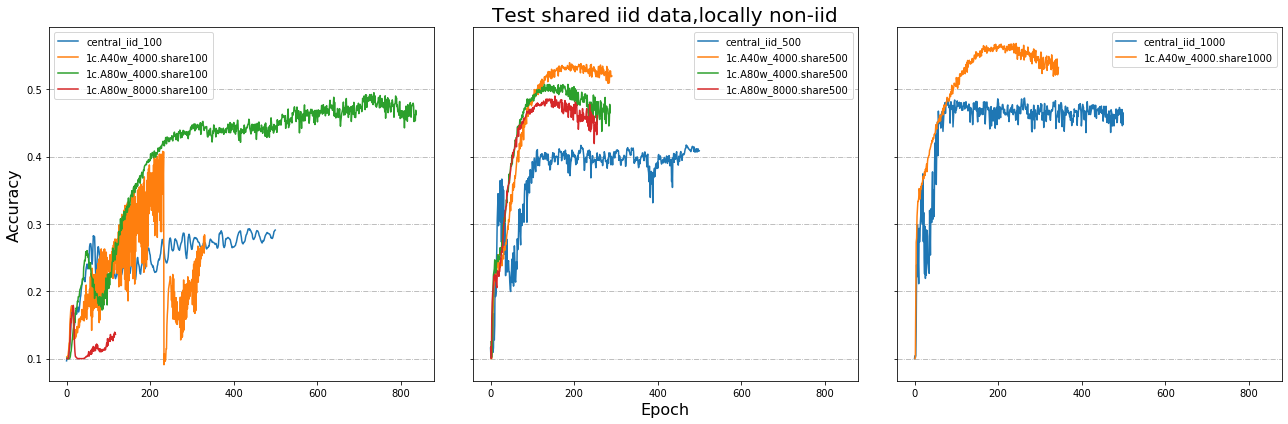

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(18, 6))

# fig.text(0.5, 0.04, 'Epoch', ha='center',fontsize=16)
# fig.text(0.2, 0.5, 'Accuracy', va='center', rotation='vertical',fontsize=16)
# fig.suptitle('Fed, Adam, Test shared iid data',fontsize=20)


    ####################### 40w
result=[
    '100_central.batch100.npy',
    'Union-1c.A.share100.loc1.earlystop100.20200311-201138.npy',
    'Union-1c.A80w_4000.share100loc1.earlystop100.20200315-020439.npy',
    'Union-1c.A80w_8000.share100loc1.earlystop100.20200312-021104.npy'
]

lab=[
    'central_iid_100', 
    '1c.A40w_4000.share100',
    '1c.A80w_4000.share100',
    '1c.A80w_8000.share100'
]

for i in range(len(result)):
    s1=np.load(os.path.join(basedir,result[i]))
    ax[0].plot(s1[0],s1[2], label=lab[i])

ax[0].set_ylabel('Accuracy',fontsize=16)
ax[0].grid(axis="y",ls='-.')
ax[0].legend()    
    
    ####################### share 500
result=[
    '500_central.batch100.npy',
    'Union-1c.A.share500.loc1.earlystop100.20200311-000622.npy',
    'Union-1c.A80w_4000.share500loc1.earlystop100.20200311-143504.npy',
    'Union-1c.A80w_8000.share500loc1.earlystop100.20200312-173505.npy'
]

lab=[
    'central_iid_500', 
    '1c.A40w_4000.share500', # A.1c.100.40W each worker plus 500 iid data, fed-train    
    '1c.A80w_4000.share500', # A.1c.50.80W each worker plus 500 iid data, fed-train
    '1c.A80w_8000.share500'
]    
for i in range(len(result)):
    s1=np.load(os.path.join(basedir,result[i]))
    ax[1].plot(s1[0],s1[2], label=lab[i])

ax[1].set_xlabel('Epoch',fontsize=16)
ax[1].set_title('Test shared iid data,locally non-iid',fontsize=20)
ax[1].grid(axis="y",ls='-.')
ax[1].legend()      
    
    ####################### share 1000
result=[
    '1000_central.batch100.npy',
    'Union-1c.A40w_4000.share1000.loc1.earlystop100.20200312-121320.npy'
]

lab=[
    'central_iid_1000', 
    '1c.A40w_4000.share1000'
]    
for i in range(len(result)):
    s1=np.load(os.path.join(basedir,result[i]))
    ax[2].plot(s1[0],s1[2], label=lab[i])

ax[2].grid(axis="y",ls='-.')
ax[2].legend()  





plt.tight_layout()

### Locally set iid with shared data
I have to say, the reason share 1000 converge/overfit faster than share 100 is: In each epoch I force it to take iid data, thus share 1000 takes more data than share 100 at each round.... I have to rethink about the test again.

In [12]:
basedir=os.path.join('share_iid')

In [13]:
# os.listdir(basedir)

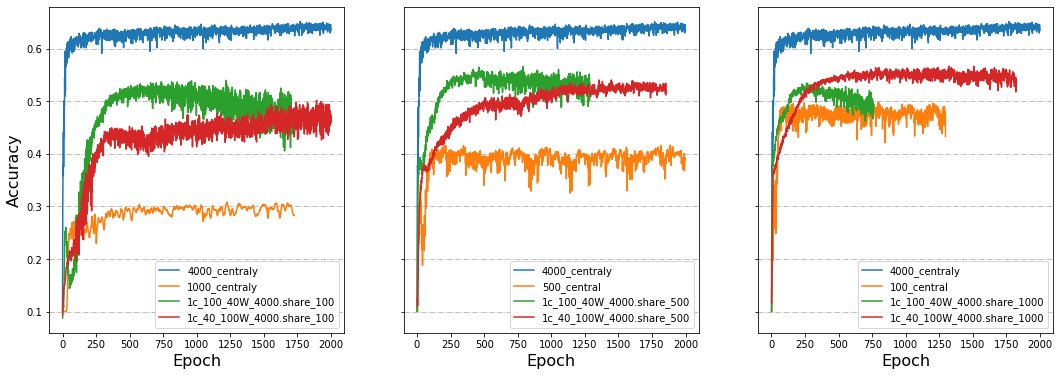

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(18, 6))

result=[
     '100_central.batch100.npy',
     '500_central.batch100.npy',
     '1000_central.batch100.npy',
     '1c_100_40W_4000.share_100.loc1.earlystop1000.20200320-215159.npy',
     '1c_100_40W_4000.share_500.loc1.earlystop1000.20200321-014241.npy',
     '1c_100_40W_4000.share_1000.loc1.earlystop1000.20200320-121722.npy',
     
     '1c_40_100W_4000.share_100.loc1.earlystop1000.20200325-123217.npy',
     '1c_40_100W_4000.share_500.loc1.earlystop1000.20200326-042138.npy',
     '1c_40_100W_4000.share_1000.loc1.earlystop1000.20200327-015029.npy',
     
    '4000_central.batch100.npy',
]

lab=[
     '1000_centraly',
     '500_central',
     '100_central',
    
     '1c_100_40W_4000.share_100',
     '1c_100_40W_4000.share_500',
     '1c_100_40W_4000.share_1000',
    
     '1c_40_100W_4000.share_100',
     '1c_40_100W_4000.share_500',
     '1c_40_100W_4000.share_1000',
    
    '4000_centraly'
]  
for i in range(3):
    s1=np.load(os.path.join(basedir,result[-1]))
    p=es_point(s1,500)
    ax[i].plot(s1[0][:p],s1[2][:p], label=lab[-1])
    
    s1=np.load(os.path.join(basedir,result[i]))
    p=es_point(s1,500)
    ax[i].plot(s1[0][:p],s1[2][:p], label=lab[i])
    
    s1=np.load(os.path.join(basedir,result[i+3]))
    p=es_point(s1,500)
    ax[i].plot(s1[0][:p],s1[2][:p], label=lab[i+3])
    
    s1=np.load(os.path.join(basedir,result[i+6]))
    p=es_point(s1,500)
    ax[i].plot(s1[0][:p],s1[2][:p], label=lab[i+6])
    
    
    ax[i].set_xlabel('Epoch',fontsize=16)
    ax[i].grid(axis="y",ls='-.')
    ax[0].set_ylabel('Accuracy',fontsize=16)
    ax[i].legend() 


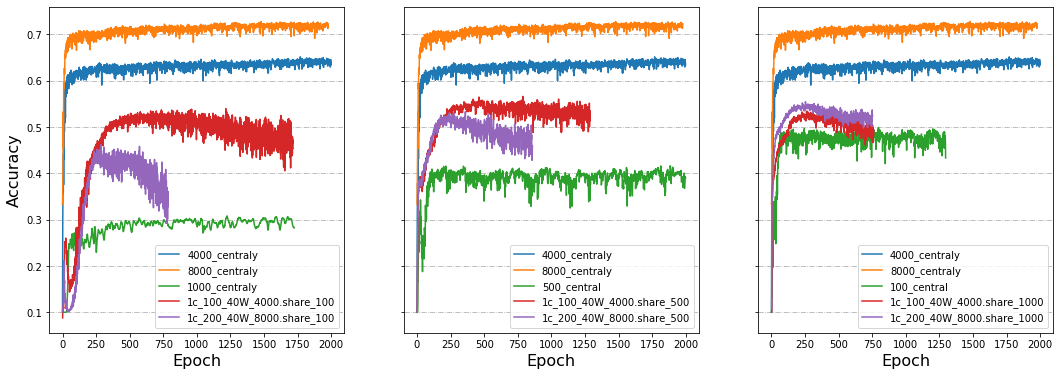

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(18, 6))

result=[
     '100_central.batch100.npy',
     '500_central.batch100.npy',
     '1000_central.batch100.npy',
     '1c_100_40W_4000.share_100.loc1.earlystop1000.20200320-215159.npy',
     '1c_100_40W_4000.share_500.loc1.earlystop1000.20200321-014241.npy',
     '1c_100_40W_4000.share_1000.loc1.earlystop1000.20200320-121722.npy',
     
     '1c_200_40W_8000.share_100.loc1.earlystop500.20200322-181933.npy',
     '1c_200_40W_8000.share_500.loc1.earlystop500.20200323-104349.npy',
     '1c_200_40W_8000.share_1000.loc1.earlystop500.20200323-145525.npy',

    
    '8000_central.batch100.npy',
    '4000_central.batch100.npy'
]

lab=[
     '1000_centraly',
     '500_central',
     '100_central',
    
     '1c_100_40W_4000.share_100',
     '1c_100_40W_4000.share_500',
     '1c_100_40W_4000.share_1000',
    
     '1c_200_40W_8000.share_100',
     '1c_200_40W_8000.share_500',
     '1c_200_40W_8000.share_1000',
    
    '8000_centraly',  
    '4000_centraly'
    
]  
for i in range(3):
    s1=np.load(os.path.join(basedir,result[-1]))
    p=es_point(s1,500)
    ax[i].plot(s1[0][:p],s1[2][:p], label=lab[-1])
    
    s1=np.load(os.path.join(basedir,result[-2]))
    p=es_point(s1,500)
    ax[i].plot(s1[0][:p],s1[2][:p], label=lab[-2])
    
    s1=np.load(os.path.join(basedir,result[i]))
    p=es_point(s1,500)
    ax[i].plot(s1[0][:p],s1[2][:p], label=lab[i])
    
    s1=np.load(os.path.join(basedir,result[i+3]))
    p=es_point(s1,500)
    ax[i].plot(s1[0][:p],s1[2][:p], label=lab[i+3])
    
    s1=np.load(os.path.join(basedir,result[i+6]))
    p=es_point(s1,500)
    ax[i].plot(s1[0][:p],s1[2][:p], label=lab[i+6])
    
    
    ax[i].set_xlabel('Epoch',fontsize=16)
    ax[i].grid(axis="y",ls='-.')
    ax[0].set_ylabel('Accuracy',fontsize=16)
    ax[i].legend() 


## Data Dispersion

In [16]:
basedir=os.path.join('data_dispersion')
os.listdir(basedir)

['2c.10W_4000.loc1.earlystop500.20200417-085230.npy',
 '2c.40W_4000.loc1.earlystop500.20200421-155338.npy',
 '2c.80W_4000.loc1.earlystop500.20200424-225252.npy',
 '5c.10W_4000.loc1.earlystop500.20200417-042135.npy',
 '5c.40W_4000.loc1.earlystop500.20200419-125703.npy',
 '5c.80W_4000.loc1.earlystop500.20200423-163133.npy',
 'iid.10W_4000.loc1.earlystop500.20200417-074006.npy',
 'iid.40W_4000.loc1.earlystop500.20200420-075052.npy',
 'iid.80W_4000.loc1.earlystop500.20200423-052557.npy']

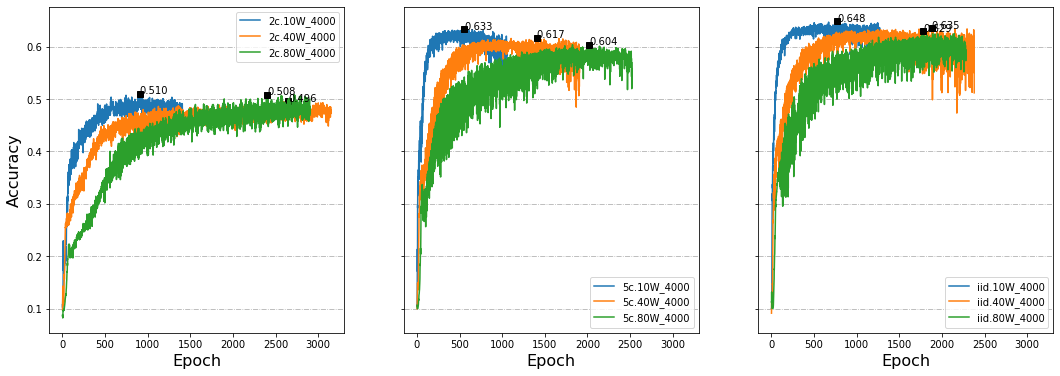

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(18, 6))

result=[
 '2c.10W_4000.loc1.earlystop500.20200417-085230.npy',
 '2c.40W_4000.loc1.earlystop500.20200421-155338.npy',
 '2c.80W_4000.loc1.earlystop500.20200424-225252.npy',
    
 '5c.10W_4000.loc1.earlystop500.20200417-042135.npy',
 '5c.40W_4000.loc1.earlystop500.20200419-125703.npy',
 '5c.80W_4000.loc1.earlystop500.20200423-163133.npy',
    
 'iid.10W_4000.loc1.earlystop500.20200417-074006.npy',
 'iid.40W_4000.loc1.earlystop500.20200420-075052.npy',
 'iid.80W_4000.loc1.earlystop500.20200423-052557.npy',
]

lab=[
 '2c.10W_4000',
 '2c.40W_4000',
 '2c.80W_4000',
    
 '5c.10W_4000',
 '5c.40W_4000',
 '5c.80W_4000',
    
 'iid.10W_4000',
 'iid.40W_4000',
 'iid.80W_4000',
] 
for i in range(3):
    
    
    for j in range(3):
        s1=np.load(os.path.join(basedir,result[i*3+j]))
        p=es_point(s1,500)
        ax[i].plot(s1[0][:p],s1[2][:p], label=lab[i*3+j])
        index_max=np.argmax(s1[2])
        ax[i].plot(index_max,s1[2][index_max],'ks')
        ax[i].annotate('{:.3f}'.format(s1[2][index_max]),
                       xytext=(index_max,s1[2][index_max]),
                       xy=(index_max,s1[2][index_max])
                      )
    
    
    ax[i].set_xlabel('Epoch',fontsize=16)
    ax[i].grid(axis="y",ls='-.')
    ax[0].set_ylabel('Accuracy',fontsize=16)
    ax[i].legend() 

## Bad Node

In [18]:
basedir=os.path.join('BadNode')
os.listdir(basedir)

['11d.10w.4000.plus1bad_each40.loc1.earlystop500.20200501-020918.npy',
 '11d.10w.4000.plus1bad_each400.loc1.earlystop500.20200501-060927.npy',
 '2c.10w.4000.plus1bad_each40.loc1.earlystop500.20200501-015142.npy',
 '2c.10w.4000.plus1bad_each400.loc1.earlystop500.20200501-031558.npy',
 '5c.10w.4000.plus1bad_each40.loc1.earlystop500.20200501-023155.npy',
 '5c.10w.4000.plus1bad_each400.loc1.earlystop500.20200501-004052.npy',
 'bad2c40',
 'bad2c400',
 'bad5c40',
 'bad5c400',
 'badiid40',
 'badiid400',
 'plot_selfEVL.ipynb']

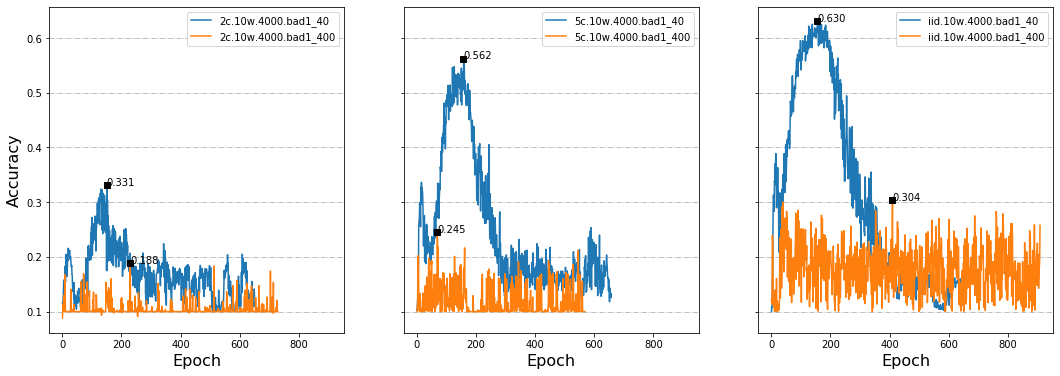

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(18, 6))

result=[
 '2c.10w.4000.plus1bad_each40.loc1.earlystop500.20200501-015142.npy',
 '2c.10w.4000.plus1bad_each400.loc1.earlystop500.20200501-031558.npy',
 '5c.10w.4000.plus1bad_each40.loc1.earlystop500.20200501-023155.npy',
 '5c.10w.4000.plus1bad_each400.loc1.earlystop500.20200501-004052.npy',
 '11d.10w.4000.plus1bad_each40.loc1.earlystop500.20200501-020918.npy',
 '11d.10w.4000.plus1bad_each400.loc1.earlystop500.20200501-060927.npy'
       ]

lab=[
 '2c.10w.4000.bad1_40',
 '2c.10w.4000.bad1_400',
 '5c.10w.4000.bad1_40',
 '5c.10w.4000.bad1_400',
 'iid.10w.4000.bad1_40',
 'iid.10w.4000.bad1_400'
       ]
for i in range(3):
    
    for j in range(2):
        s1=np.load(os.path.join(basedir,result[i*2+j]))
        p=es_point(s1,500)
        ax[i].plot(s1[0][:p],s1[2][:p], label=lab[i*2+j])
        index_max=np.argmax(s1[2])
        ax[i].plot(index_max,s1[2][index_max],'ks')
        ax[i].annotate('{:.3f}'.format(s1[2][index_max]),
                       xytext=(index_max,s1[2][index_max]),
                       xy=(index_max,s1[2][index_max])
                      )
    
    
    ax[i].set_xlabel('Epoch',fontsize=16)
    ax[i].grid(axis="y",ls='-.')
    ax[0].set_ylabel('Accuracy',fontsize=16)
    ax[i].legend() 

## Local Steps

In [20]:
basedir=os.path.join('LocalStep')
os.listdir(basedir)

['2c.10w.4000.loc1.earlystop500.20200501-072809.npy',
 '5c.10w.4000.loc1.earlystop500.20200501-024326.npy',
 'iid.10w.4000.loc1.earlystop500.20200501-020117.npy',
 'loc2c1s',
 'loc5c1s',
 'lociid1s']

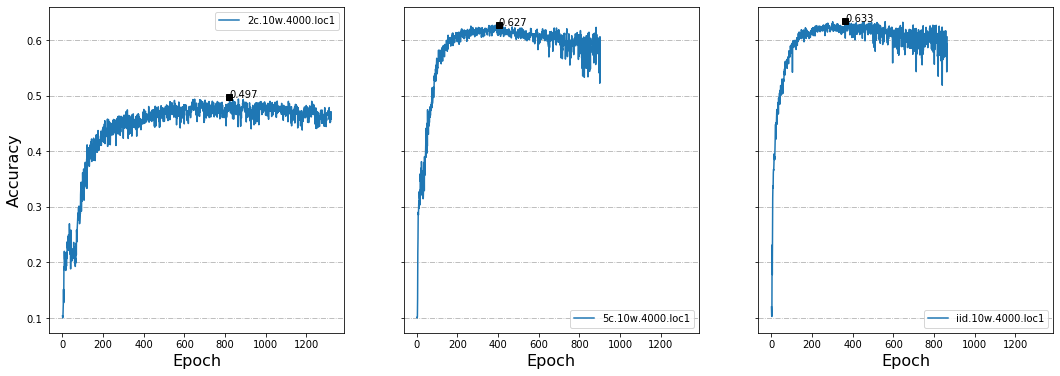

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(18, 6))

result=[
'2c.10w.4000.loc1.earlystop500.20200501-072809.npy',
 '5c.10w.4000.loc1.earlystop500.20200501-024326.npy',
 'iid.10w.4000.loc1.earlystop500.20200501-020117.npy']

lab=[
'2c.10w.4000.loc1',
 '5c.10w.4000.loc1',
 'iid.10w.4000.loc1']


x = 1
for i in range(3):
    
    for j in range(x):
        s1=np.load(os.path.join(basedir,result[i*x+j]))
        p=es_point(s1,500)
        ax[i].plot(s1[0][:p],s1[2][:p], label=lab[i*x+j])
        index_max=np.argmax(s1[2])
        ax[i].plot(index_max,s1[2][index_max],'ks')
        ax[i].annotate('{:.3f}'.format(s1[2][index_max]),
                       xytext=(index_max,s1[2][index_max]),
                       xy=(index_max,s1[2][index_max])
                      )
    
    
    ax[i].set_xlabel('Epoch',fontsize=16)
    ax[i].grid(axis="y",ls='-.')
    ax[0].set_ylabel('Accuracy',fontsize=16)
    ax[i].legend() 

## Late update in some node

In [21]:
# basedir=os.path.join('late_update')
# os.listdir(basedir)

In [22]:
# fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(18, 6))

# result=[
#  '2c.40W_4000.dly20_speed18.loc1.earlystop500.20200418-085337.npy',
#  '2c.40W_4000.dly20_speed6.loc1.earlystop500.20200420-075615.npy',
#  '2c.40W_4000.dly20_speed3.loc1.earlystop500.20200419-051259.npy',
#  '2c.40W_4000.dly50_speed3.loc1.earlystop500.20200418-221251.npy',
#  '2c.40W_4000.dly80_speed3.loc1.earlystop500.20200417-225916.npy',
    
    
#  '5c.40W_4000.dly20_speed18.loc1.earlystop500.20200418-103353.npy',
#  '5c.40W_4000.dly20_speed6.loc1.earlystop500.20200418-111253.npy',
#  '5c.40W_4000.dly20_speed3.loc1.earlystop500.20200419-064045.npy',
#  '5c.40W_4000.dly50_speed3.loc1.earlystop500.20200418-130236.npy',
#  '5c.40W_4000.dly80_speed3.loc1.earlystop500.20200418-154345.npy',
    
    
#  'iid.40W_4000.dly20_speed18.loc1.earlystop500.20200420-185019.npy',
#  'iid.40W_4000.dly20_speed6.loc1.earlystop500.20200419-030730.npy',
#  'iid.40W_4000.dly20_speed3.loc1.earlystop500.20200419-194730.npy',
#  'iid.40W_4000.dly50_speed3.loc1.earlystop500.20200419-173256.npy',
#  'iid.40W_4000.dly80_speed3.loc1.earlystop500.20200419-035543.npy',
    
# #     '4000_central.batch50.npy'
# ]

# lab=[
#  '2c.40W.dly20_speed18',
#  '2c.40W.dly20_speed6',
#  '2c.40W.dly20_speed3',
#  '2c.40W.dly50_speed3',
#  '2c.40W.dly80_speed3',
    
    
#  '5c.40W.dly20_speed18',
#  '5c.40W.dly20_speed6',
#  '5c.40W.dly20_speed3',
#  '5c.40W.dly50_speed3',
#  '5c.40W.dly80_speed3',
    
    
#  'iid.40W.dly20_speed18',
#  'iid.40W.dly20_speed6',
#  'iid.40W.dly20_speed3',
#  'iid.40W.dly50_speed3',
#  'iid.40W.dly80_speed3',
    
# #     'central'
# ]  
# for i in range(3):
    
#     s1=np.load(os.path.join(basedir,result[-1]))   #改一下， xx class 的non-delay 版本 & 重新跑test if it overfits on delayed or non-delayed part?
# #     p=es_point(s1,500)
# #     ax[i].plot(s1[0][:p],s1[2][:p], label=lab[-1])
    
#     for j in range(5):
#         s1=np.load(os.path.join(basedir,result[i*5+j]))
#         p=es_point(s1,500)
#         ax[i].plot(s1[0][:p],s1[2][:p], label=lab[i*5+j])
#         index_max=np.argmax(s1[2])
#         ax[i].plot(index_max,s1[2][index_max],'ks')
#         ax[i].annotate('{:.3f}'.format(s1[2][index_max]),
#                        xytext=(index_max,s1[2][index_max]),
#                        xy=(index_max,s1[2][index_max])
#                       )
    
    
#     ax[i].set_xlabel('Epoch',fontsize=16)
#     ax[i].grid(axis="y",ls='-.')
#     ax[0].set_ylabel('Accuracy',fontsize=16)
#     ax[i].legend() 
